# ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
import sklearn.metrics as metrics

# Input Data

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
dft = pd.read_csv('testing3.csv')

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X_train = df.drop('label',axis=1).values
y_train = df['label'].values

X_test = dft.drop('label',axis=1).values
y_test = dft['label'].values

# One-hot encode the target

In [5]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

In [6]:
print(y_train.shape, y_test.shape)

(26999, 6) (1500, 6)


# scale the features

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential()

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=521,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
%%time
model.fit(x=X_train, y=y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

Train on 26999 samples, validate on 1500 samples
Epoch 1/100
26999/26999 [==============================] - 29s 1ms/sample - loss: 1.6396 - accuracy: 0.3168 - val_loss: 1.4389 - val_accuracy: 0.4780
Epoch 2/100
26999/26999 [==============================] - 1s 51us/sample - loss: 1.3231 - accuracy: 0.4923 - val_loss: 1.2639 - val_accuracy: 0.5300
Epoch 3/100
26999/26999 [==============================] - 1s 22us/sample - loss: 1.1831 - accuracy: 0.5482 - val_loss: 1.2151 - val_accuracy: 0.5647
Epoch 4/100
26999/26999 [==============================] - 1s 22us/sample - loss: 1.0976 - accuracy: 0.5806 - val_loss: 1.1037 - val_accuracy: 0.6273
Epoch 5/100
26999/26999 [==============================] - 1s 22us/sample - loss: 1.0330 - accuracy: 0.6097 - val_loss: 1.0398 - val_accuracy: 0.6580
Epoch 6/100
26999/26999 [==============================] - 1s 23us/sample - loss: 0.9761 - accuracy: 0.6323 - val_loss: 0.9776 - val_accuracy: 0.6540
Epoch 7/100
26999/26999 [==========================

Epoch 55/100
26999/26999 [==============================] - 1s 23us/sample - loss: 0.3322 - accuracy: 0.8743 - val_loss: 0.1893 - val_accuracy: 0.9213
Epoch 56/100
26999/26999 [==============================] - 1s 23us/sample - loss: 0.3333 - accuracy: 0.8734 - val_loss: 0.2216 - val_accuracy: 0.9067
Epoch 57/100
26999/26999 [==============================] - 1s 22us/sample - loss: 0.3306 - accuracy: 0.8723 - val_loss: 0.1970 - val_accuracy: 0.9180
Epoch 58/100
26999/26999 [==============================] - 1s 22us/sample - loss: 0.3232 - accuracy: 0.8761 - val_loss: 0.1916 - val_accuracy: 0.9273
Epoch 59/100
26999/26999 [==============================] - 1s 23us/sample - loss: 0.3278 - accuracy: 0.8750 - val_loss: 0.1771 - val_accuracy: 0.9287
Epoch 60/100
26999/26999 [==============================] - 1s 22us/sample - loss: 0.3142 - accuracy: 0.8794 - val_loss: 0.1832 - val_accuracy: 0.9320
Epoch 61/100
26999/26999 [==============================] - 1s 23us/sample - loss: 0.3202 - ac

# Modle Performance

In [10]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

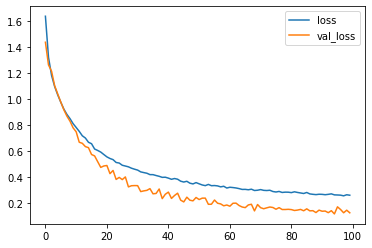

In [11]:
losses[['loss','val_loss']].plot()

# Predict

In [12]:
predictions = model.predict(X_test)


# Confusion Matrix

In [13]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(predictions,axis=1)

In [14]:
print(confusion_matrix(y_test_arg, Y_pred))

[[241   8   0   0   0   1]
 [  0 249   1   0   0   0]
 [  0   0 250   0   0   0]
 [ 23   2   0 225   0   0]
 [  9   0   0   0 236   5]
 [ 26   0   0   1   0 223]]


<AxesSubplot:>

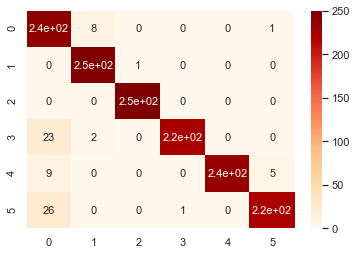

In [15]:
array = metrics.confusion_matrix(y_test_arg, Y_pred)
df_cm = pd.DataFrame(array, range(6), range(6))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 11}, cmap="OrRd") # font size

# classification Report

In [16]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       250
           1       0.96      1.00      0.98       250
           2       1.00      1.00      1.00       250
           3       1.00      0.90      0.95       250
           4       1.00      0.94      0.97       250
           5       0.97      0.89      0.93       250

    accuracy                           0.95      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.96      0.95      0.95      1500

